In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
#read the csv file
cwd = os.getcwd()
home_folder = os.path.dirname(cwd)
data_path = home_folder + '/labelers_weight.txt'
#set divider of cvs as ; and no coliumn names
df = pd.read_csv(data_path, sep=';', header=None)


#set the column names
df.columns = ['labeler', 'weight','lbl 0','lbl 1','lbl 2','lbl 3','lbl 255']
#set type of labeler as string
df['labeler'] = df['labeler'].astype(str)
#set type of weight as float casting the column
df['weight'] = df['weight'].str.replace(',', '.')
df['weight'] = df['weight'].astype(float)
dimension = 1024*1024
df['weight'] = df['weight']/dimension*100


print(df)
print(df.info())

                    labeler     weight
0                   2082767  12.691972
1                   2098082  14.179000
2                   1979136  18.260324
3                   2094824  11.869255
4                   2109038   8.418210
...                     ...        ...
10034  8d04f7e9c254bcd3c56d  40.847111
10035  813f0a31d8067d2693df  25.719929
10036  c7278a50a5dfcfa6fc51  12.057877
10037  034b72cb0d2101353cfc  23.560238
10038  0a5e80cfe6d2313e2b3e   7.371998

[10039 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   labeler  10039 non-null  object 
 1   weight   10039 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.0+ KB
None


In [13]:
df.describe()

,weight
count,10039.000000
mean,26.062814
std,18.397922
min,0.000000
25%,13.343545
50%,20.837196
75%,33.976502
max,98.272705


array([[<Axes: title={'center': 'weight'}>]], dtype=object)

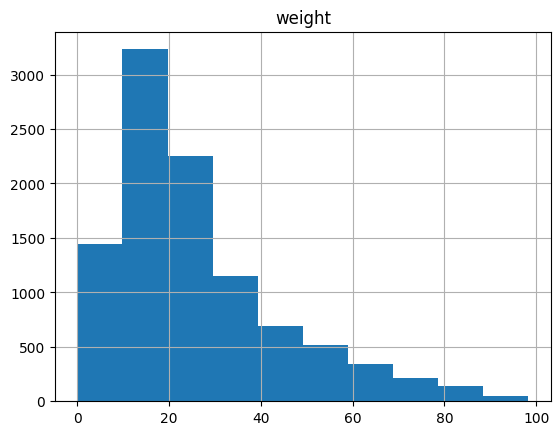

In [14]:
df.hist()

In [15]:
df.isnull().sum()


labeler    0
weight     0
dtype: int64

In [16]:
#calculate the mean the medianm the mode and teh standard deviation
mean = df['weight'].mean()
median = df['weight'].median()
mode = df['weight'].mode()
std = df['weight'].std()

print('Mean: ', mean)
print('Median: ', median)
print('Standard Deviation: ', std)

Mean:  26.062814194209448
Median:  20.83719571431478
Standard Deviation:  18.39792156971985


In [17]:

def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

1.4543281203307101
146
10039


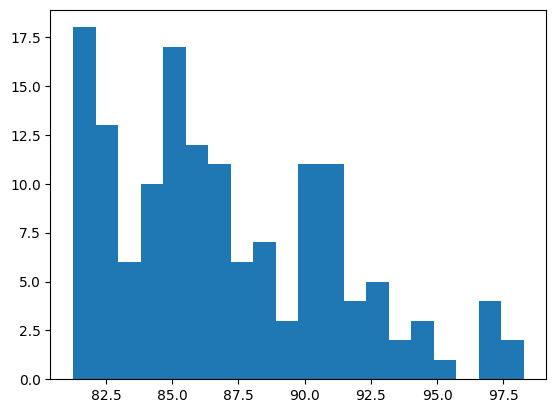

In [18]:
outliers = detect_outliers(df['weight'])
plt.hist(outliers, bins=20)
print(len(outliers)/len(df['weight'])*100)
print(len(outliers))
print(len(df['weight']))

In [19]:
#drop the outliers
df = df[~df['weight'].isin(outliers)]

In [20]:
#save the cleaned data in a new csv file
#df.to_csv(home_folder + '/cleaned_labelers_weight.csv', sep=';', index=False)

In [ ]:

import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('data.csv')
profile = ProfileReport(df, title="Profiling Report")